<a href="https://colab.research.google.com/github/Bee0933/credit_card_fraud_detection/blob/master/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import all libraries to be used  

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.externals 
import joblib
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, mean_squared_error

import creditcard dataset from google drive 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from_drive = pd.read_csv('/content/gdrive/My Drive/creditcard.csv')

make copy of orignal dataset for modification 

In [ ]:
df = from_drive.copy()

visualization of dataset

In [ ]:
pd.set_option('display.max_columns', False)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Reduce Data Set size


In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
#change datatype size to reduce df size 
df.iloc[:, :df.shape[0]-1] = df.astype(np.float32)
df.Class = df.Class.astype(np.int8)
df.dtypes

Time      float32
V1        float32
V2        float32
V3        float32
V4        float32
V5        float32
V6        float32
V7        float32
V8        float32
V9        float32
V10       float32
V11       float32
V12       float32
V13       float32
V14       float32
V15       float32
V16       float32
V17       float32
V18       float32
V19       float32
V20       float32
V21       float32
V22       float32
V23       float32
V24       float32
V25       float32
V26       float32
V27       float32
V28       float32
Amount    float32
Class        int8
dtype: object

function to check for missing/NA values 

In [ ]:
def na_values(frame):
    return frame.isna().sum(), frame.isnull().values.any()


In [ ]:
print(f'na values: {na_values(df)[0]}   empty values: {na_values(df)[1]}')


na values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64   empty values: False


check for categorical data and visualize it -- but in this case all features are regressive/continous   

In [ ]:
for column in df.columns:
    if df[column].dtype == object: # categorical data are representd as objects -- check with '.dtype' statement  
        print(df[column].unique()) #returns sumary of values in a category 
        print(df[column].value_count())

In [ ]:
#brief ststistics on the dataset 
print(df.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94812.664062 -6.765166e-07  ...      88.322945       0.001727
std     47487.195312  1.958611e+00  ...     250.071564       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165001       0.000000
max    172792.000000  2.454930e+00  ...   25691.160156       1.000000

[8 rows x 31 columns]


chek for matching features using the correlation funtion 

In [ ]:
#check for correlated features to avoid using similar dataset features that would confuse your algorithm
correlation_view = df.corr()
print(correlation_view)

            Time            V1            V2  ...           V28    Amount     Class
Time    1.000000  1.173963e-01 -1.059333e-02  ... -9.412688e-03 -0.010596 -0.012323
V1      0.117396  1.000000e+00 -1.434458e-10  ... -6.581722e-10 -0.227709 -0.101347
V2     -0.010593 -1.434458e-10  1.000000e+00  ... -9.894851e-10 -0.531409  0.091289
V3     -0.419618  9.352130e-11  2.206431e-10  ... -2.291611e-10 -0.210880 -0.192961
V4     -0.105260  4.361167e-11  1.418380e-10  ...  2.875709e-10  0.098732  0.133447
V5      0.173072  2.734343e-10  7.482466e-10  ...  5.806698e-10 -0.386356 -0.094974
V6     -0.063016  6.668705e-11 -4.452510e-10  ... -3.203046e-10  0.215981 -0.043643
V7      0.084714  1.600768e-12 -8.202219e-10  ...  4.271452e-10  0.397311 -0.187257
V8     -0.036949 -1.130106e-10 -2.659411e-10  ...  5.912647e-10 -0.103079  0.019875
V9     -0.008660 -2.198748e-10 -1.494593e-10  ... -1.213193e-10 -0.044246 -0.097733
V10     0.030617 -1.856517e-10 -2.897835e-11  ...  1.170881e-10 -0.101502 -0

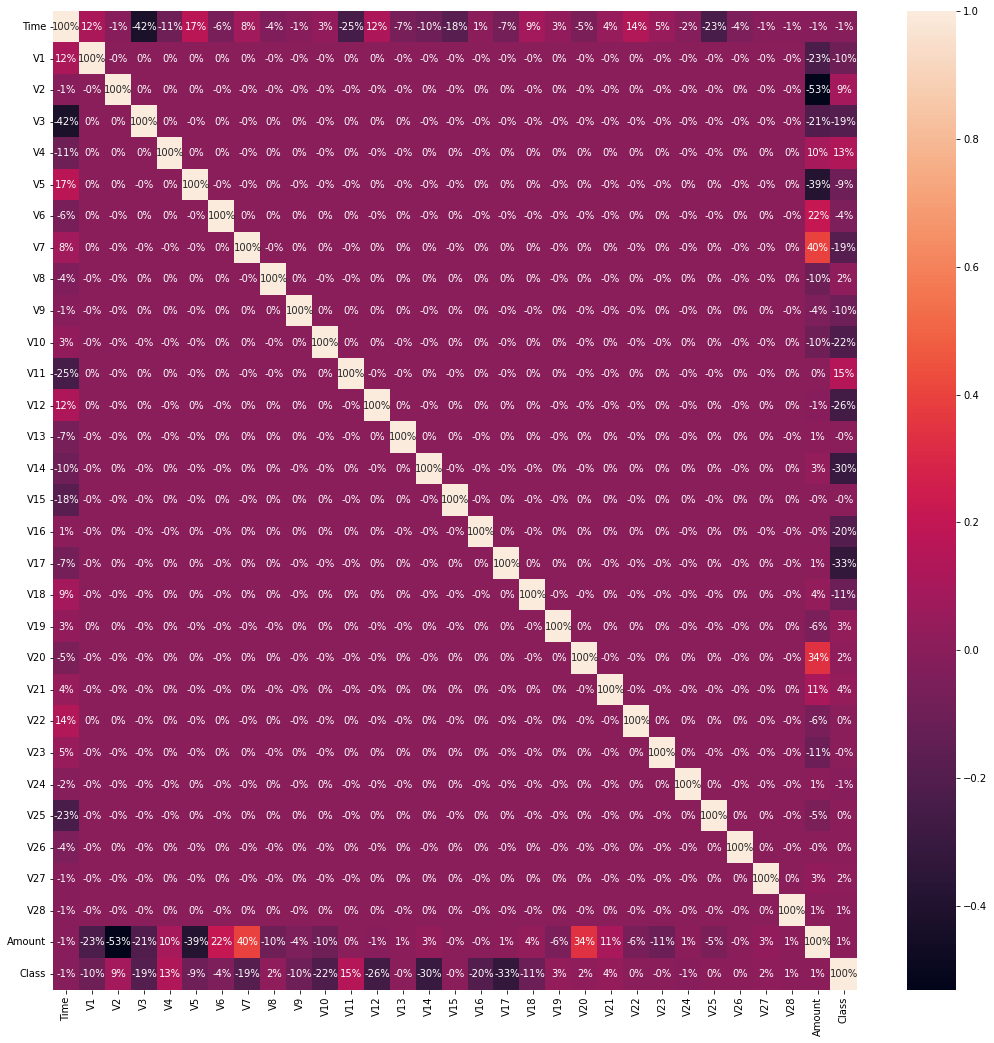

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(correlation_view, annot=True, fmt='.0%')
#The correlation values tend to be minimal so we can work with it 

selecting features and labels 

In [ ]:
X_val = df.drop('Class', axis=1)
y_val = df.Class


#seperating training data from validation data with a test size of 20%
XTrain, XTest, yTrain, yTest = model_selection.train_test_split(X_val,y_val, test_size=0.2, random_state=0)

#ML models i would use to classify my data 
models = { 'kNN' : KNeighborsClassifier(),
           'SVC' : SVC(),
           'DecisionTreeClassifier' : DecisionTreeClassifier()
}

Training and validating to choose a more accurate model

In [ ]:
for name, model in models.items():  #iterating through my imported models present in the dictionary 'models'
    #training each model
    model.fit(XTrain,yTrain)
    #predict for train and test models to check for underfitting and overfitting     
    pred_train = model.predict(XTrain)  
    pred_test = model.predict(XTest)
    #validation result for each model using MAE  
    mae_train = mean_absolute_error(yTrain, pred_train)
    mae_test = mean_absolute_error(yTest, pred_test)
    print(f'{name} model : \n  MAE train: {mae_train}  MAE test : {mae_test}')


kNN model : 
  MAE train: 0.0015185762250652856  MAE test : 0.0016853340823707033
SVC model : 
  MAE train: 0.0017160789132963199  MAE test : 0.001773111899160844
DecisionTreeClassifier model : 
  MAE train: 0.0  MAE test : 0.000772444787753239


The decisionTreeClassifier model is quite efficient - lets try more leafs to minimise underfitting and overfitting 

In [ ]:
max_leaf = [5,50,500,5000] #assumed numbers of leafs that would work well 

#function to return better validation result 
def return_mae(leafs, xTrain,xTest,yTrain,yTest):
  for leaf in leafs:
    model = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=0)
    model.fit(xTrain,yTrain)
    pred_train = model.predict(xTrain)
    pred_test = model.predict(xTest)
    mae_train = mean_absolute_error(yTrain, pred_train)
    mae_test = mean_absolute_error(yTest, pred_test)
    print(f'{str(leaf)} leafs model : \n  MAE train: {mae_train}  MAE test : {mae_test}')
  
return_mae(max_leaf,XTrain, XTest, yTrain, yTest)

5 leafs model : 
  MAE train: 0.0006934538831222981  MAE test : 0.0007548892243952109
50 leafs model : 
  MAE train: 0.0002326142772498848  MAE test : 0.0005968891541729574
500 leafs model : 
  MAE train: 0.0  MAE test : 0.0007548892243952109
5000 leafs model : 
  MAE train: 0.0  MAE test : 0.0007548892243952109


using  max of 50 leafs works better with minimal result <br> 
max leafs of  5 is quite good too <br>
but 500 and 5000 suffers from overfitting of the data <br> 
<br>
so max leaf of 50 is the best for now 

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=50, random_state=0)
model.fit(XTrain,yTrain)


pred_test = model.predict(XTest)
mae_test = mean_absolute_error(yTest, pred_test)

more validation with confussion matrix

In [ ]:
cm = confusion_matrix(yTest, pred_test)

#true negative 
#true positive 
#false negetive 
#false positive 

TN = cm[0][0]
TP = cm[1][1]
FN = cm[0][1]
FP = cm[1][0]

accuracy = ((TP + TN )/ (TP + TN + FN + FP))

cm

array([[56850,    11],
       [   23,    78]])

In [ ]:
print(f'accuracy  = {np.round(accuracy*100,2)}%')

accuracy  = 99.94%


its a good accuracy -- pls try other models to see the accuracy score 

In [ ]:
#saving the trained model state 
file_name = 'trained_creditcard_fraud_detection.sav'
deploy_model = model
joblib.dump(deploy_model, filename=file_name)

['trained_creditcard_fraud_detection.sav']